In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = os.getcwd()
fi = path + ".\spam.csv"
fi

'C:\\Users\\Delip\\spam mail.\\spam.csv'

In [3]:
f=pd.read_csv(fi,encoding=('ISO-8859-1'))
f.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
f.shape

(5572, 5)

In [5]:
f.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
f.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
f.rename(columns={'v1':'target','v2':'message'},inplace=True)
f.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
en=  LabelEncoder()



In [8]:
f['target']=en.fit_transform(f['target'])

In [9]:
f.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
f.duplicated().sum()

403

In [11]:
f=f.drop_duplicates(keep='first')

In [12]:
f.duplicated().sum()

0

In [13]:
f.shape

(5169, 2)

In [14]:
f.isnull().sum()

target     0
message    0
dtype: int64

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Delip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
f['n_c']=f['message'].apply(len)
f.head()

,target,message,n_c
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
f['n_w']=f['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
f.head()

,target,message,n_c,n_w
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
f['n_s']=f['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
f.head()

,target,message,n_c,n_w,n_s
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
f[['n_c','n_w','n_s']].describe()

,n_c,n_w,n_s
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


C:\Users\Delip\AppData\Local\Temp\ipykernel_15288\2084477755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = f.corr()


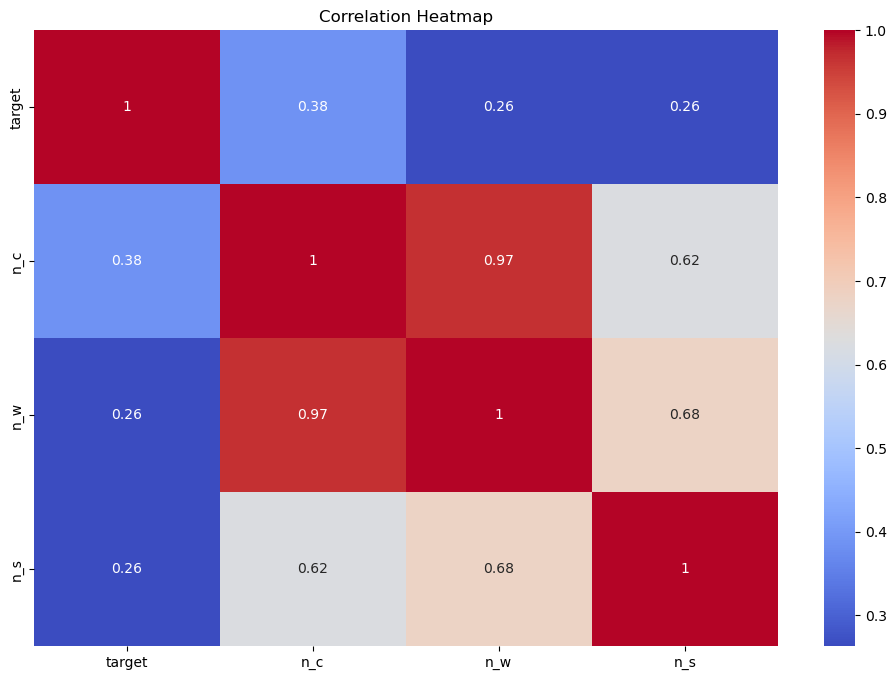

In [23]:

correlation_matrix = f.corr()
 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [25]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()
ps.stem('kicking')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Delip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('haclking')

'haclk'

In [27]:
f['tra_te'] = f['message'].apply(transform_text)
f.head()

,target,message,n_c,n_w,n_s,tra_te
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [28]:
spam_corpu = []
for msg in f[f['target'] == 1]['tra_te'].tolist():
    for word in msg.split():
        spam_corpu.append(word)
        

In [29]:
len(spam_corpu)

9939

In [30]:
from collections import Counter
pd.DataFrame(Counter(spam_corpu).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
cfg=TfidfVectorizer()


In [32]:
x=cfg.fit_transform(f['tra_te']).toarray()
x.shape

(5169, 6708)

In [33]:
y=f['target'].values

In [34]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [36]:
X = tfidf.fit_transform(f['tra_te']).toarray()

In [37]:
from sklearn.model_selection import train_test_split
X_tr,X_te,Y_tr,Y_te=train_test_split(x,y,test_size=0.23,random_state=42)

In [38]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [39]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
gnb.fit(X_tr,Y_tr)
y_pred1 = gnb.predict(X_te)
print(accuracy_score(Y_te,y_pred1))
print(confusion_matrix(Y_te,y_pred1))
print(precision_score(Y_te,y_pred1))

0.8679562657695542
[[889 131]
 [ 26 143]]
0.5218978102189781


In [50]:
mnb.fit(X_tr,Y_tr)
y_pred1 =mnb.predict(X_te)
print(accuracy_score(Y_te,y_pred1))
print(confusion_matrix(Y_te,y_pred1))
print(precision_score(Y_te,y_pred1))

0.9562657695542472
[[1020    0]
 [  52  117]]
1.0


In [51]:
bnb.fit(X_tr,Y_tr)
y_pred1 = bnb.predict(X_te)
print(accuracy_score(Y_te,y_pred1))
print(confusion_matrix(Y_te,y_pred1))
print(precision_score(Y_te,y_pred1))

0.9655172413793104
[[1016    4]
 [  37  132]]
0.9705882352941176


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [53]:
svc = SVC(kernel='sigmoid', gamma=1.0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)

In [54]:
svc.fit(X_tr,Y_tr)
y_pred1 = svc.predict(X_te)
print(accuracy_score(Y_te,y_pred1))
print(confusion_matrix(Y_te,y_pred1))
print(precision_score(Y_te,y_pred1))

0.975609756097561
[[1014    6]
 [  23  146]]
0.9605263157894737
